<a href="https://colab.research.google.com/github/MarcinAn/analiza_danych/blob/main/analiza_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobieranie danych**

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('HRDataset.csv')
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

# **Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?**

In [162]:
manager_performance=df[{'ManagerName','PerformanceScore'}]
manager_performance.dropna(inplace=True)
manager_performance['PerformanceCount']=manager_performance['PerformanceScore']
manager_performance_pivot=manager_performance.pivot_table(values='PerformanceCount', index='ManagerName', columns='PerformanceScore', aggfunc='count').fillna(0)


def percent(row):
  percent = row['Exceeds']+ row['Fully Meets']+ row['Needs Improvement']+ row['PIP']
  return percent

manager_performance_pivot['Exceeds_percent']= round(manager_performance_pivot['Exceeds']/manager_performance_pivot.apply(lambda row: percent(row),axis=1),2)
manager_performance_pivot['Fully_meets_percent']= round(manager_performance_pivot['Fully Meets']/manager_performance_pivot.apply(lambda row: percent(row),axis=1),2)
manager_performance_pivot['Needs_improvement_percent']= round(manager_performance_pivot['Needs Improvement']/manager_performance_pivot.apply(lambda row: percent(row),axis=1),2)
manager_performance_pivot['PIP_percent']= round(manager_performance_pivot['PIP']/manager_performance_pivot.apply(lambda row: percent(row),axis=1),2)
manager_performance_pivot.drop(['Exceeds',	'Fully Meets',	'Needs Improvement',	'PIP'], axis=1, inplace=True)

<ipython-input-162-7c22b675908a>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  manager_performance=df[{'ManagerName','PerformanceScore'}]
<ipython-input-162-7c22b675908a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_performance.dropna(inplace=True)
<ipython-input-162-7c22b675908a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager_performance['PerformanceCount']=manager_performance['PerformanceScore']


<Figure size 640x480 with 0 Axes>

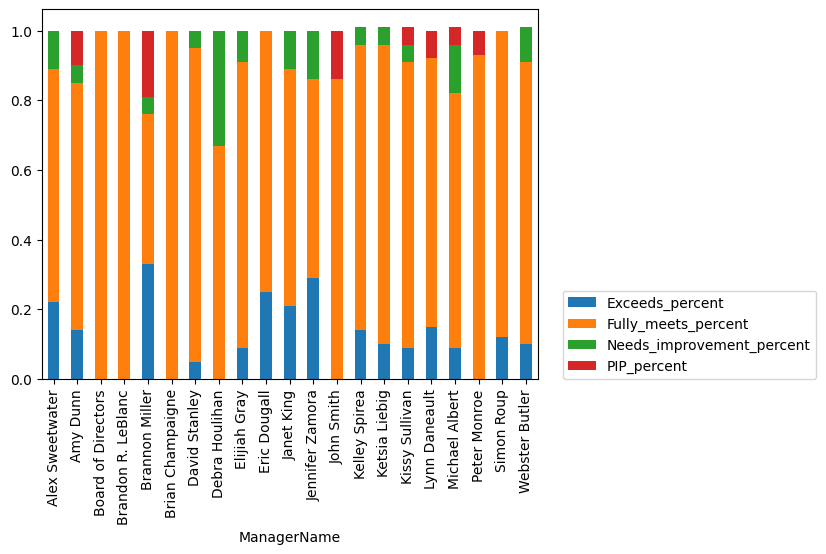

In [163]:
from numpy.ma.core import size
plt.figure()
ax= manager_performance_pivot.plot(kind = 'bar', stacked = True)
ax.legend(loc=(1.05,0.0))
plt.show()

***Do obgadania na spotkaniu***

---



# **Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?**

In [164]:
recruitment_seniority=df[{'RecruitmentSource','DateofHire','DateofTermination'}]
recruitment_seniority.dropna(inplace=True)

<ipython-input-164-d893c7ae0017>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  recruitment_seniority=df[{'RecruitmentSource','DateofHire','DateofTermination'}]
<ipython-input-164-d893c7ae0017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority.dropna(inplace=True)


In [165]:
recruitment_seniority['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
recruitment_seniority['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

<ipython-input-165-279c2f252ec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
<ipython-input-165-279c2f252ec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')


In [166]:
import datetime as dt
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [167]:
recruitment_seniority['Seniority'] = recruitment_seniority.apply(lambda row: count_seniority(row),axis=1)

<ipython-input-167-6fa5160e980a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_seniority['Seniority'] = recruitment_seniority.apply(lambda row: count_seniority(row),axis=1)


In [168]:
recruitment_seniority_pivot=recruitment_seniority.pivot_table(values='Seniority', index='RecruitmentSource', aggfunc='median')
recruitment_seniority_pivot.reset_index(inplace=True)
recruitment_seniority_pivot.sort_values(by='Seniority', ascending=False, inplace=True)

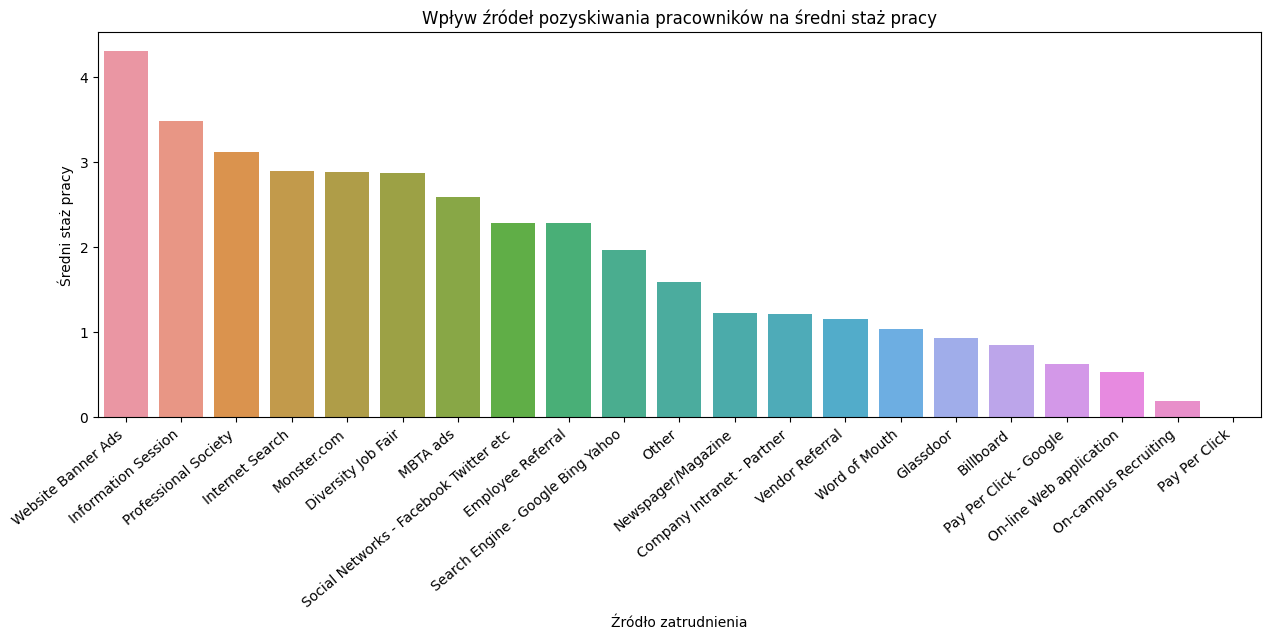

In [169]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='RecruitmentSource',y='Seniority',data=recruitment_seniority_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Źródło zatrudnienia')
plt.ylabel('Średni staż pracy')
plt.title('Wpływ źródeł pozyskiwania pracowników na średni staż pracy')
plt.show()

**Pracownicy z najdłuższym stażem pracy zostali pozyskani przy pomocy "Website Banner Ads"**

---



# **Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?**

In [170]:
marital_satisfaction=df[{'MaritalDesc', 'EmpSatisfaction'}]
marital_satisfaction.dropna(inplace=True)
marital_satisfaction
marital_satisfaction_pivot=marital_satisfaction.pivot_table(values='EmpSatisfaction', index='MaritalDesc', aggfunc='mean')
marital_satisfaction_pivot.reset_index(inplace=True)
marital_satisfaction_pivot.sort_values(by='EmpSatisfaction',ascending=False,inplace=True)

<ipython-input-170-aab7b33544d0>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  marital_satisfaction=df[{'MaritalDesc', 'EmpSatisfaction'}]
<ipython-input-170-aab7b33544d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_satisfaction.dropna(inplace=True)


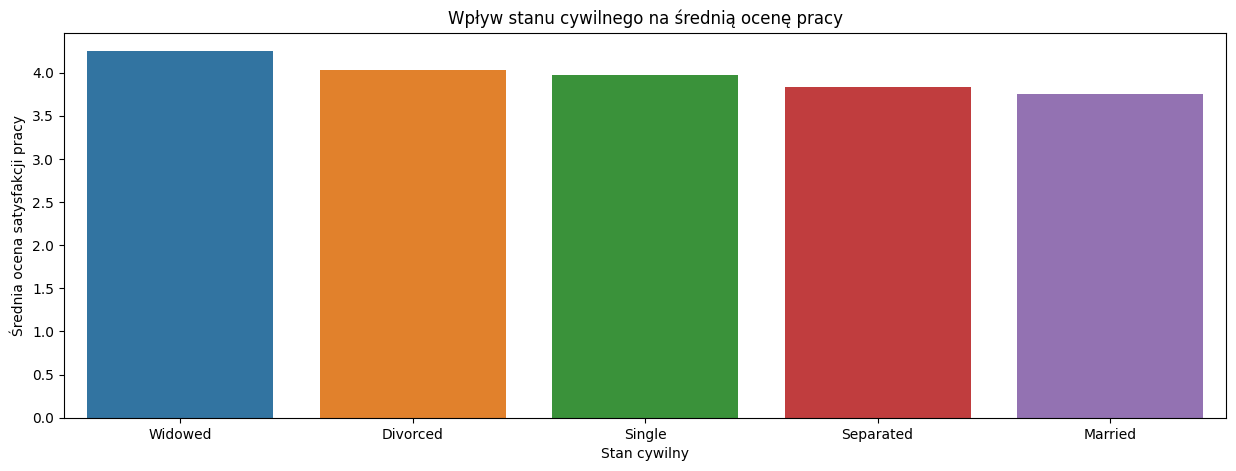

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=marital_satisfaction_pivot)
plt.xlabel('Stan cywilny')
plt.ylabel('Średnia ocena satysfakcji pracy')
plt.title('Wpływ stanu cywilnego na średnią ocenę pracy')
plt.show()

In [172]:
print(round(marital_satisfaction_pivot.iloc[0,1]-marital_satisfaction_pivot.iloc[4,1],1))

0.5


**Różnica pomiędzy najlepiej oceniającymi swoją pracę "Windowed" a najgorzej oceniającymi "Married" wynosi około 0,5 punkta.**

---



# **Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?**

In [173]:
age=df[{'DOB', 'DateofTermination','SpecialProjectsCount', 'Sex'}]
age.fillna(0, inplace=True)
age=age[age['DateofTermination']==0]
age.drop('DateofTermination', axis=1, inplace=True)
age=age[age['DOB']!=0]

<ipython-input-173-93443f0eb16c>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age=df[{'DOB', 'DateofTermination','SpecialProjectsCount', 'Sex'}]
<ipython-input-173-93443f0eb16c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.fillna(0, inplace=True)


In [174]:
def fix_year(x):
  if (int(x[-2:]) > 23):
    return 2023- (1900 + int(x[-2:]))
  else:
    return 2023- (2000 + int(x[-2:]))
age['birth_year']=age['DOB'].apply(lambda x: fix_year(x))

In [175]:
age_pivot=age.pivot_table(values='DOB', index=['birth_year', 'Sex'], aggfunc='count')
age_pivot.reset_index(inplace=True)
age_pivot= age_pivot[((age_pivot['Sex'] == 'F') & (age_pivot['birth_year'] <=60)) | ((age_pivot['Sex'] != 'F') & (age_pivot['birth_year'] <=65))]
age_pivot.sort_values(by='birth_year', inplace=True)

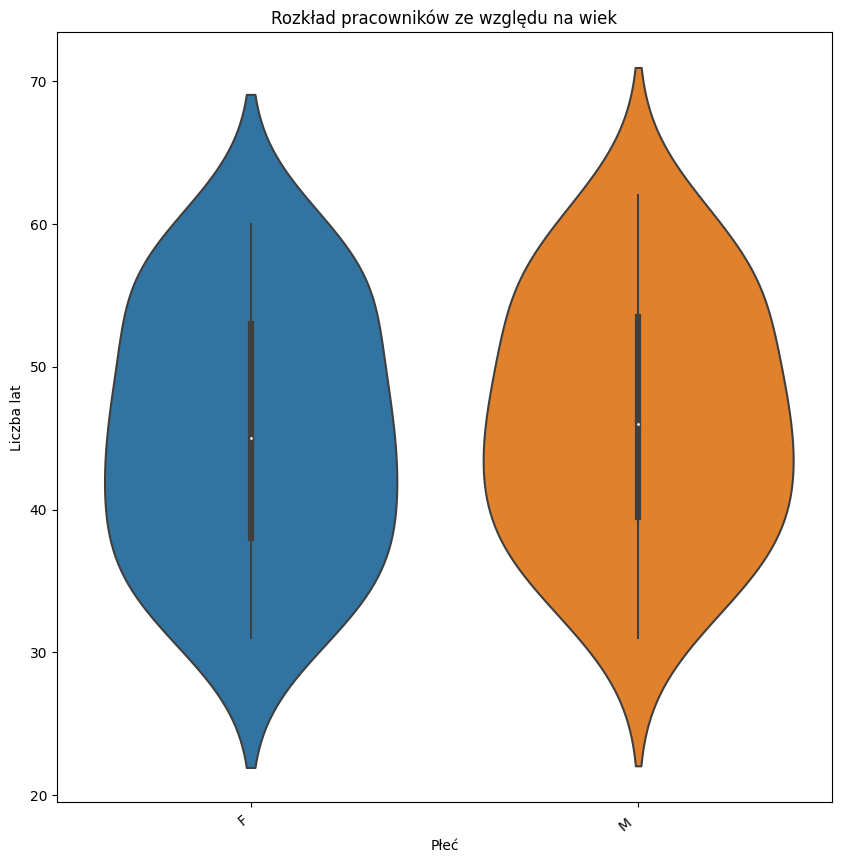

In [176]:
plt.figure(figsize=(10,10))
#ax=sns.barplot(x='birth_year',y='DOB',data=age_pivot)
ax=sns.violinplot(x='Sex', y='birth_year', data= age_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Płeć')
plt.ylabel('Liczba lat')
plt.title('Rozkład pracowników ze względu na wiek')
plt.show()

# **Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?**

In [177]:
special_pivot=age.pivot_table(values='SpecialProjectsCount', index='birth_year', aggfunc='sum')
special_pivot.reset_index(inplace=True)
special_pivot.sort_values(by='birth_year', inplace=True)

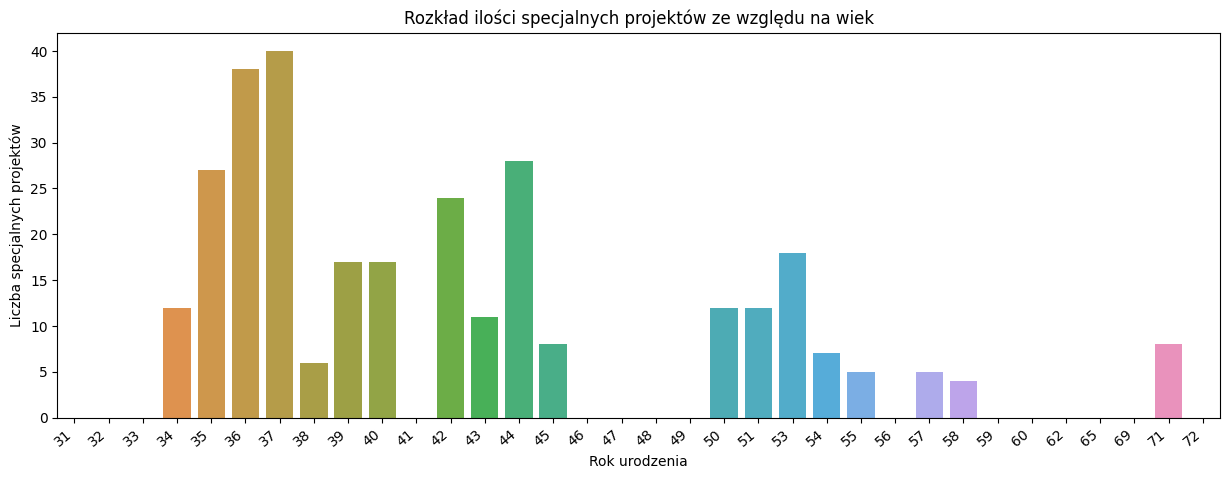

In [178]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='birth_year',y='SpecialProjectsCount',data=special_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Rok urodzenia')
plt.ylabel('Liczba specjalnych projektów')
plt.title('Rozkład ilości specjalnych projektów ze względu na wiek')
plt.show()

**Pracownicy urodzeni w roku 1979 i później pracują nad większą ilością specjalnych projektów.**

---

